##Project Background

“Walmart is an American multinational retail corporation that operates a chain of
hypermarkets, discount department stores, and grocery stores” (Wikipedia). The company has
45 stores across the United States. Every year the company runs several promotional
markdown events before prominent holidays like Super Bowl, Labor Day, Thanksgiving, and
Christmas to increase sales.

##Problem Statement

This project studies Walmart’s historical sales data for 45 stores in the United States to
assist Walmart’s management team in the decision-making process by:
• Performing exploratory data analysis and time series analysis of Walmart’s sales data
• Identifying the factors that impact sales
• Developing time series models to forecast Walmart’s future sales

#1 Importing Libraries

In [3]:
import math
import numpy as np
import pandas as pd
from IPython.display import display
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#2 Data loading

In [4]:
features = pd.read_csv('/content/drive/MyDrive/Final Project/datasets/features.csv')
sales = pd.read_csv("/content/drive/MyDrive/Final Project/datasets/train.csv")
stores = pd.read_csv("/content/drive/MyDrive/Final Project/datasets/stores.csv")
test = pd.read_csv("/content/drive/MyDrive/Final Project/datasets/testMerged.csv")


#features.csv
This file contains 8,190 records related to the store, department, and regional activity for the given dates and includes the following fields:

 Store – the store number

 Date – last day of the week

Temperature – average temperature in the region in Fahrenheit

Fuel_Price – weekly average fuel price (USD)

MarkDown1-5 – anonymized data related to promotional markdowns that Walmart
is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time.

CPI – consumer price index

Unemployment – weekly average unemployment rate

IsHoliday – True if holiday falls within the week. False if holiday does not fall within the week.

In [5]:
features.shape

(8190, 12)

In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [7]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


#sales.csv
This file contains 421,570 Walmart’s historical sales records from February 5th, 2010 to November 1st, 2012 and includes the following fields:

Store – the store number

Dept – the department number

Date – last day of the week

Weekly_Sales

▪ Weekly sales for the given department in the given store

▪ Negative if returns exceed sales

▪ Positive if sales exceed returns

IsHoliday – True if special holiday falls within the week; otherwise, False

In [8]:
sales.shape

(421570, 5)

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [10]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


#stores.csv
This file contains information about 45 Walmart stores and includes the following fields:

o Store – the store number

o Type – the type of store (A, B, or C)

o Size – the size of store in square feet

In [11]:
stores.shape

(45, 3)

In [12]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [13]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


#1. Data Preparation

### Convert data type

In [14]:
# convert data type for Date from object to Date
sales['Date'] = pd.to_datetime(sales['Date'])
features['Date'] = pd.to_datetime(features['Date'])

##Missing Values



In [15]:
# stores::Checking % of null value
round(100*(stores.isnull().sum())/len(stores.index),2).sort_values(ascending=False)

Store    0.0
Type     0.0
Size     0.0
dtype: float64

In [16]:
# features::Checking % of null value
round(100*(features.isnull().sum())/len(features.index),2).sort_values(ascending=False)

MarkDown2       64.33
MarkDown4       57.70
MarkDown3       55.89
MarkDown1       50.77
MarkDown5       50.55
CPI              7.14
Unemployment     7.14
Store            0.00
Date             0.00
Temperature      0.00
Fuel_Price       0.00
IsHoliday        0.00
dtype: float64

There are seven columns that contain missing values including MarkDown 1-5, CPI, and Unemployment. Since most missing values exist because there was no information available at a specific time, fields containing missing values are left as ‘NA’. The table above lists columns that have missing values

In [17]:
# sales::Checking % of null value
round(100*(sales.isnull().sum())/len(sales.index),2).sort_values(ascending=False)

Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
dtype: float64

#Adding New Columns
The following variables have been added to the dataset:

Num of Depts = counts of number of departments for each store

Dept Weekly Sales (Thousand) = Weekly_Sales / 1000

Avg Yearly Sales (Million) = average yearly sales per store

Avg Yearly MarkDown (Thousand) = average yearly markdown per store

Week = week of year extracted from Date

Month = month extracted from Date

Year = year extracted from Date

Quarter = quarter extracted from Date

In [18]:
# create a store_sales data frame that contains total sales for each store

# add columns to sales df
sales['Dept Weekly Sales (Thousand)'] = sales['Weekly_Sales'] / 1000

# total sales by store and date
weekly_sales = sales.groupby(by=['Store', 'Date'])['Dept Weekly Sales (Thousand)'].sum().to_frame().reset_index()
weekly_sales.rename(columns={'Dept Weekly Sales (Thousand)': 'Store Weekly Sales (Thousand)'}, inplace=True)

# merge store_sales and features
store_sales = pd.merge(weekly_sales, features, how='inner', on=['Store', 'Date'])
store_sales['Week'] = store_sales['Date'].dt.week
store_sales['Month'] = store_sales['Date'].dt.month
store_sales['Year'] = store_sales['Date'].dt.year
store_sales['Quarter'] = store_sales['Date'].dt.quarter
store_sales.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)
store_sales.head()

<ipython-input-18-637642ae25b8>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  store_sales['Week'] = store_sales['Date'].dt.week


,Store,Date,Store Weekly Sales (Thousand),Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Week,Month,Year,Quarter
0,1,2010-02-05,1643.69090,42.31,2.572,211.096358,8.106,False,5,2,2010,1
1,1,2010-02-12,1641.95744,38.51,2.548,211.242170,8.106,True,6,2,2010,1
2,1,2010-02-19,1611.96817,39.93,2.514,211.289143,8.106,False,7,2,2010,1
3,1,2010-02-26,1409.72759,46.63,2.561,211.319643,8.106,False,8,2,2010,1
4,1,2010-03-05,1554.80668,46.50,2.625,211.350143,8.106,False,9,3,2010,1


In [19]:
# number of departments by store
departments = sales.groupby(by=['Store', 'Dept']).count().reset_index()[['Store', 'Dept']].groupby(by='Store').count().reset_index()
departments.rename(columns={'Dept': 'Num of Depts'}, inplace=True)


In [20]:
# add Avg Yearly Sales to stores df
avg_yearly_sales = store_sales.groupby(by=['Store', 'Year'])['Store Weekly Sales (Thousand)'].sum()\
                  .to_frame().reset_index().groupby(by=['Store'])['Store Weekly Sales (Thousand)'].mean().to_frame().reset_index()

avg_yearly_sales['Avg Yearly Sales (Million)'] = avg_yearly_sales['Store Weekly Sales (Thousand)'] / 1000
avg_yearly_sales.drop('Store Weekly Sales (Thousand)', axis=1, inplace=True)

In [21]:
# total markdown
features['MarkDown'] = features['MarkDown1'] + features['MarkDown2'] + features['MarkDown3'] + \
                             features['MarkDown4'] + features['MarkDown5']
features['Year'] = features['Date'].dt.year
markdowns = features.groupby(by=['Store', 'Year'])['MarkDown'].sum().to_frame().reset_index()\
                    .groupby(by=['Store'])['MarkDown'].mean().to_frame().reset_index()
markdowns['Avg Yearly MarkDown (Thousand)'] = markdowns['MarkDown'] / 1000
markdowns.drop('MarkDown', axis=1, inplace=True)


In [22]:
stores = pd.merge(stores, departments, how='inner', on='Store')  # merge stores and departments
stores = pd.merge(stores, avg_yearly_sales, how='inner', on='Store')  # merge stores and store_sales
stores = pd.merge(stores, markdowns, how='inner', on='Store')    # merge stores and markdowns
store_sales = pd.merge(store_sales, features[['Store', 'Date', 'MarkDown']], how='inner', on=['Store', 'Date'])

In [23]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Dept Weekly Sales (Thousand)
0,1,1,2010-02-05,24924.50,False,24.92450
1,1,1,2010-02-12,46039.49,True,46.03949
2,1,1,2010-02-19,41595.55,False,41.59555
3,1,1,2010-02-26,19403.54,False,19.40354
4,1,1,2010-03-05,21827.90,False,21.82790


In [24]:
stores.head()

,Store,Type,Size,Num of Depts,Avg Yearly Sales (Million),Avg Yearly MarkDown (Thousand)
0,1,A,151315,77,74.134270,412.964688
1,2,A,202307,78,91.794147,541.514955
2,3,B,37392,72,19.195578,98.148110
3,4,A,205863,78,99.847984,543.798450
4,5,B,34875,72,15.158563,119.658845


In [25]:
store_sales.head()

,Store,Date,Store Weekly Sales (Thousand),Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Week,Month,Year,Quarter,MarkDown
0,1,2010-02-05,1643.69090,42.31,2.572,211.096358,8.106,False,5,2,2010,1,NaN
1,1,2010-02-12,1641.95744,38.51,2.548,211.242170,8.106,True,6,2,2010,1,NaN
2,1,2010-02-19,1611.96817,39.93,2.514,211.289143,8.106,False,7,2,2010,1,NaN
3,1,2010-02-26,1409.72759,46.63,2.561,211.319643,8.106,False,8,2,2010,1,NaN
4,1,2010-03-05,1554.80668,46.50,2.625,211.350143,8.106,False,9,3,2010,1,NaN


In [26]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Store                          6435 non-null   int64         
 1   Date                           6435 non-null   datetime64[ns]
 2   Store Weekly Sales (Thousand)  6435 non-null   float64       
 3   Temperature                    6435 non-null   float64       
 4   Fuel_Price                     6435 non-null   float64       
 5   CPI                            6435 non-null   float64       
 6   Unemployment                   6435 non-null   float64       
 7   IsHoliday                      6435 non-null   bool          
 8   Week                           6435 non-null   int64         
 9   Month                          6435 non-null   int64         
 10  Year                           6435 non-null   int64         
 11  Quarter          

#Outliers

In [27]:
def boxplot(df_in, num_cols=2, figsize=(10, 8)):
    num_rows = math.ceil(len(df_in.columns) / num_cols)
    fig, axes = plt.subplots(figsize=figsize, nrows=num_rows, ncols=num_cols) 
    col = row = 0
    for col_name in df_in.columns:
        if num_rows == 1 and num_cols == 1:
            ax = axes
        elif num_rows == 1 and num_cols > 1:
            ax = axes[col]
        else:
            ax = axes[row, col]
        # draw boxplot
        _ = sns.boxplot(df_in[col_name], ax=ax, orient='v')
        ax.set_ylabel(col_name, fontsize=14)
        
        # set index for column and row
        col += 1
        if col == num_cols:
            col = 0        # reset column
            row = row + 1  # set to next row  
    
    plt.subplots_adjust(hspace=0.4, wspace=0.4)   
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("V

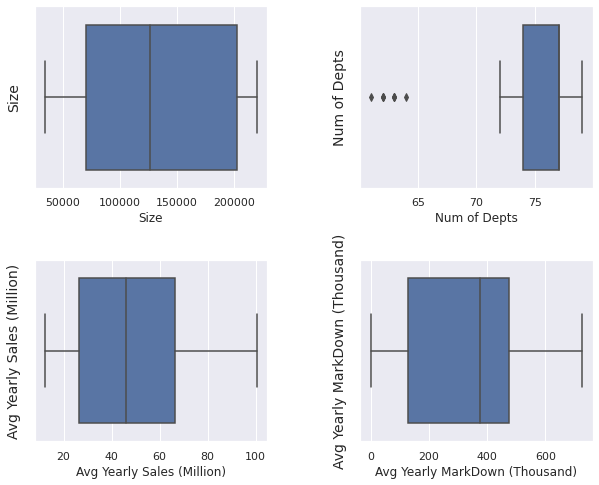

In [28]:
# stores df
boxplot(stores.select_dtypes(include=['number']).drop('Store', axis=1))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


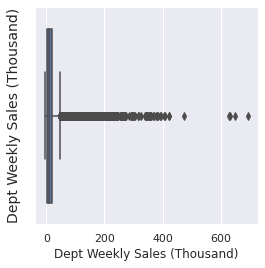

In [29]:

# sales df
boxplot(sales['Dept Weekly Sales (Thousand)'].to_frame(), num_cols=1, figsize=(4,4))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("V

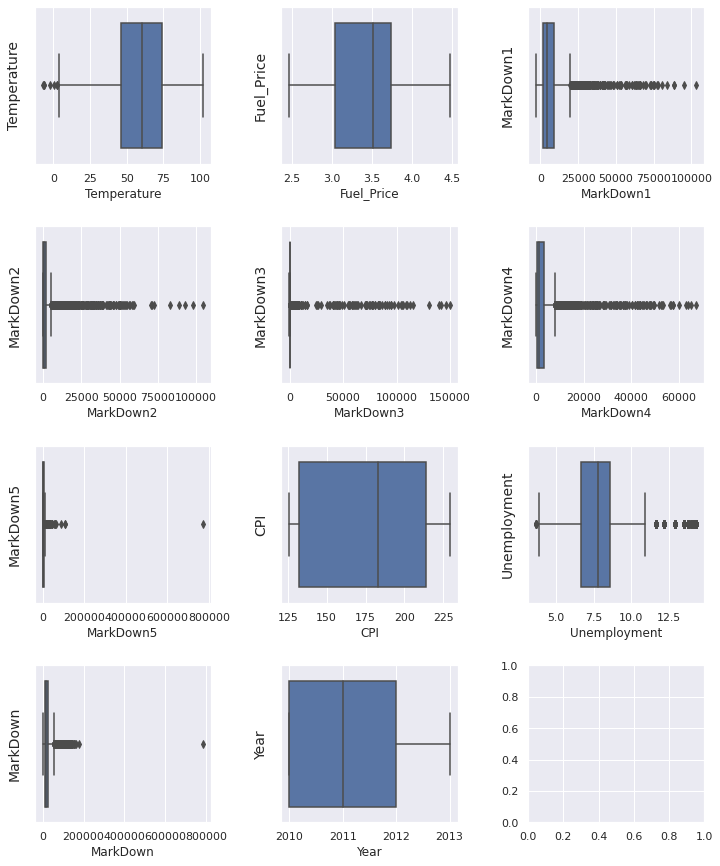

In [30]:
# features df
boxplot(features.select_dtypes(include=['number']).drop('Store', axis=1), num_cols=3, figsize=(12, 15))

###Outliers
There are 9 columns that have outliers: 

Num of Depts, 

Dept Weekly Sales (Thousand),

Temperature, 

MarkDown1-5,

and Unemployment. 

Since outliers may contain important information, no outliers have been removed from the table. 

### weekly_sales 
Createing a data frame weekly_sales that include Walmart's weekly sales across all stores.


In [31]:
# weekly sales across all Walmart's stores
weekly_sales = store_sales.groupby(by=['Date', 'IsHoliday', 'Week', 'Month', 
                                       'Quarter', 'Year'])['Store Weekly Sales (Thousand)'].sum().to_frame().reset_index()
weekly_sales['Weekly Sales (Million)'] = weekly_sales['Store Weekly Sales (Thousand)'] / 1000
del weekly_sales['Store Weekly Sales (Thousand)']

# create data frame of the missing weeks and fill in the 2011-2012 average sales of the corresponding weeks
missing_weeks = pd.DataFrame({'Date': ['2010-01-08', '2010-01-15', '2010-01-22', '2010-01-29'],
                 'IsHoliday': ['False','False', 'False', 'False'],
                 'Week': [1, 2, 3, 4],
                 'Month': [1, 1, 1, 1],
                 'Quarter': [1, 1, 1, 1],
                 'Year': [2010, 2010, 2010, 2010],
                 'Weekly Sales (Million)': [np.NaN, np.NaN, np.NaN, np.NaN]})
missing_weeks['Date'] = pd.to_datetime(missing_weeks['Date'])
cond1 = weekly_sales.Week >= 0
cond2 = weekly_sales.Week < 5
missing_weeks['Weekly Sales (Million)'] = weekly_sales[cond1 & cond2].groupby(['Week'])['Weekly Sales (Million)'].mean().reset_index()['Weekly Sales (Million)']

# concatenate data frames and reset index
weekly_sales = pd.concat([missing_weeks, weekly_sales]).reset_index()
del weekly_sales['index']

In [32]:
weekly_sales.head()

,Date,IsHoliday,Week,Month,Quarter,Year,Weekly Sales (Million)
0,2010-01-08,False,1,1,1,2010,43.865605
1,2010-01-15,False,2,1,1,2010,41.348378
2,2010-01-22,False,3,1,1,2010,41.367822
3,2010-01-29,False,4,1,1,2010,39.717414
4,2010-02-05,False,5,2,1,2010,49.750740


In [36]:
store_sales.isna().sum()

Store                               0
Date                                0
Store Weekly Sales (Thousand)       0
Temperature                         0
Fuel_Price                          0
CPI                                 0
Unemployment                        0
IsHoliday                           0
Week                                0
Month                               0
Year                                0
Quarter                             0
MarkDown                         5040
dtype: int64

In [37]:
store_sales['MarkDown']=store_sales['MarkDown'].fillna(store_sales['MarkDown'].mean())

In [38]:
store_sales.isna().sum()

Store                            0
Date                             0
Store Weekly Sales (Thousand)    0
Temperature                      0
Fuel_Price                       0
CPI                              0
Unemployment                     0
IsHoliday                        0
Week                             0
Month                            0
Year                             0
Quarter                          0
MarkDown                         0
dtype: int64

#Export Data

In [34]:
# save data frame to pickle file
stores.to_pickle('/content/drive/MyDrive/Final Project/Out1/stores.pkl')
features.to_pickle('/content/drive/MyDrive/Final Project/Out1/features.pkl')
sales.to_pickle('/content/drive/MyDrive/Final Project/Out1/sales.pkl')
store_sales.to_pickle('/content/drive/MyDrive/Final Project/Out1/store_sales.pkl')
weekly_sales.to_pickle('/content/drive/MyDrive/Final Project/Out1/weekly_sales.pkl')

In [39]:
store_sales.to_csv('/content/drive/MyDrive/Final Project/Out1/store_sales.csv')
weekly_sales.to_csv('/content/drive/MyDrive/Final Project/Out1/weekly_sales.csv')